In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import glob
import numpy as np
import cv2

In [ ]:
import torchvision as tv

trainTransform  = tv.transforms.Compose([tv.transforms.Grayscale(num_output_channels=1),
                                    tv.transforms.ToTensor(), 
                                    tv.transforms.Normalize((0.5,), (0.5,))])

In [ ]:
from torchvision.datasets import ImageFolder
import torch.utils.data as data
from torchvision import transforms

### ImageFolder 작성
train_imgs = ImageFolder("/content/drive/MyDrive/pytorch/week 3/train", transform=transforms.Compose([transforms.RandomCrop(100), transforms.Grayscale(num_output_channels=1), transforms.ToTensor()]))

test_imgs = ImageFolder("/content/drive/MyDrive/pytorch/week 3/validation", transform=transforms.Compose([transforms.RandomCrop(100), transforms.Grayscale(num_output_channels=1), transforms.ToTensor()]))

train_loader = data.DataLoader(train_imgs, batch_size=64, shuffle=True)
test_loader = data.DataLoader(test_imgs, batch_size=64, shuffle=True)

In [ ]:
len(train_loader)

16

In [ ]:
len(test_loader)

10

In [ ]:
print(train_imgs.classes)
print(train_imgs.class_to_idx)

['cats', 'dogs']
{'cats': 0, 'dogs': 1}


Feature batch shape: torch.Size([64, 1, 100, 100])
Labels batch shape: torch.Size([64])
torch.Size([1, 100, 100])
torch.Size([100, 100])


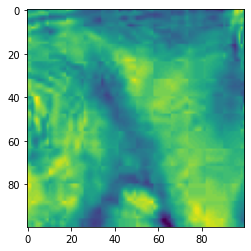

Label: 1


In [ ]:
# Display image and label.
train_features, train_labels = next(iter(train_loader))

print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

print(train_features[0].shape)
img = train_features[0].squeeze()
label = train_labels[0]

print(img.shape)

plt.imshow(img)
plt.show()

print(f"Label: {label}")

In [ ]:
class ImageTransform():

    def __init__(self, mean, std):
        self.data_transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize(mean, std)
        ])

    def __call__(self, img):
        return self.data_transform(img)

In [ ]:
"""# dataset이 없을 경우, 임의로 만들어주기 위한 코드

import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, img_dir, transform=None, target_transform=None):
        self.img_dir = img_dir
        self.transform = transforma
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        sample = {"image": image, "label": label}
        return sample"""

훈련해보기

In [ ]:
# Convolutional neural network (two convolutional layers)

import torch.nn as nn
import torch.nn.functional as F


class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.network2D = nn.Sequential(
           nn.Conv2d(1, 32, kernel_size=5, stride=1, padding=2),
           nn.ReLU(),
           nn.MaxPool2d(kernel_size=2, stride=2),
           nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2),
           nn.ReLU(),
           nn.MaxPool2d(kernel_size=2, stride=2))
        self.network1D = nn.Sequential(
           nn.Dropout(),
           nn.Linear(7 * 7 * 64, 1000),
           nn.Linear(1000, 10))

In [ ]:
model = ConvNet()
print(model)

ConvNet(
  (network2D): Sequential(
    (0): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (network1D): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=3136, out_features=1000, bias=True)
    (2): Linear(in_features=1000, out_features=10, bias=True)
  )
)


In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

for epoch in range(2):   # 데이터셋을 수차례 반복합니다.

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # [inputs, labels]의 목록인 data로부터 입력을 받은 후;
        inputs, labels = data

        # 변화도(Gradient) 매개변수를 0으로 만들고
        optimizer.zero_grad()

        # 순전파 + 역전파 + 최적화를 한 후
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # 통계를 출력합니다.
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

In [ ]:
nb_epochs = 20
for epoch in range(nb_epochs+1):

    # H(x) 계산
    prediction = model(train_features)

    # cost 계산
    cost = F.mse_loss(prediction, train_labels) # <== 파이토치에서 제공하는 평균 제곱 오차 함수

    # cost로 H(x) 개선하는 부분
    # gradient를 0으로 초기화
    optimizer.zero_grad()
    # 비용 함수를 미분하여 gradient 계산
    cost.backward() # backward 연산
    # W와 b를 업데이트
    optimizer.step()

    if epoch % 2 == 0:
    # 2번마다 로그 출력
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))

NotImplementedError: ignored